## Title - Transforming FITS Images into Stunning RGB Visuals

## Problem Statment - 
The challenge is to develop a solution that can convert FITS (Flexible Image Transport System) files, commonly used in astronomy, into visually striking RGB (Red, Green, Blue) images. This transformation is essential for scientific analysis, educational outreach, and artistic exploration. The solution must address data complexity, color mapping, dynamic range, and usability to make astronomical data accessible and captivating to a broader audience.

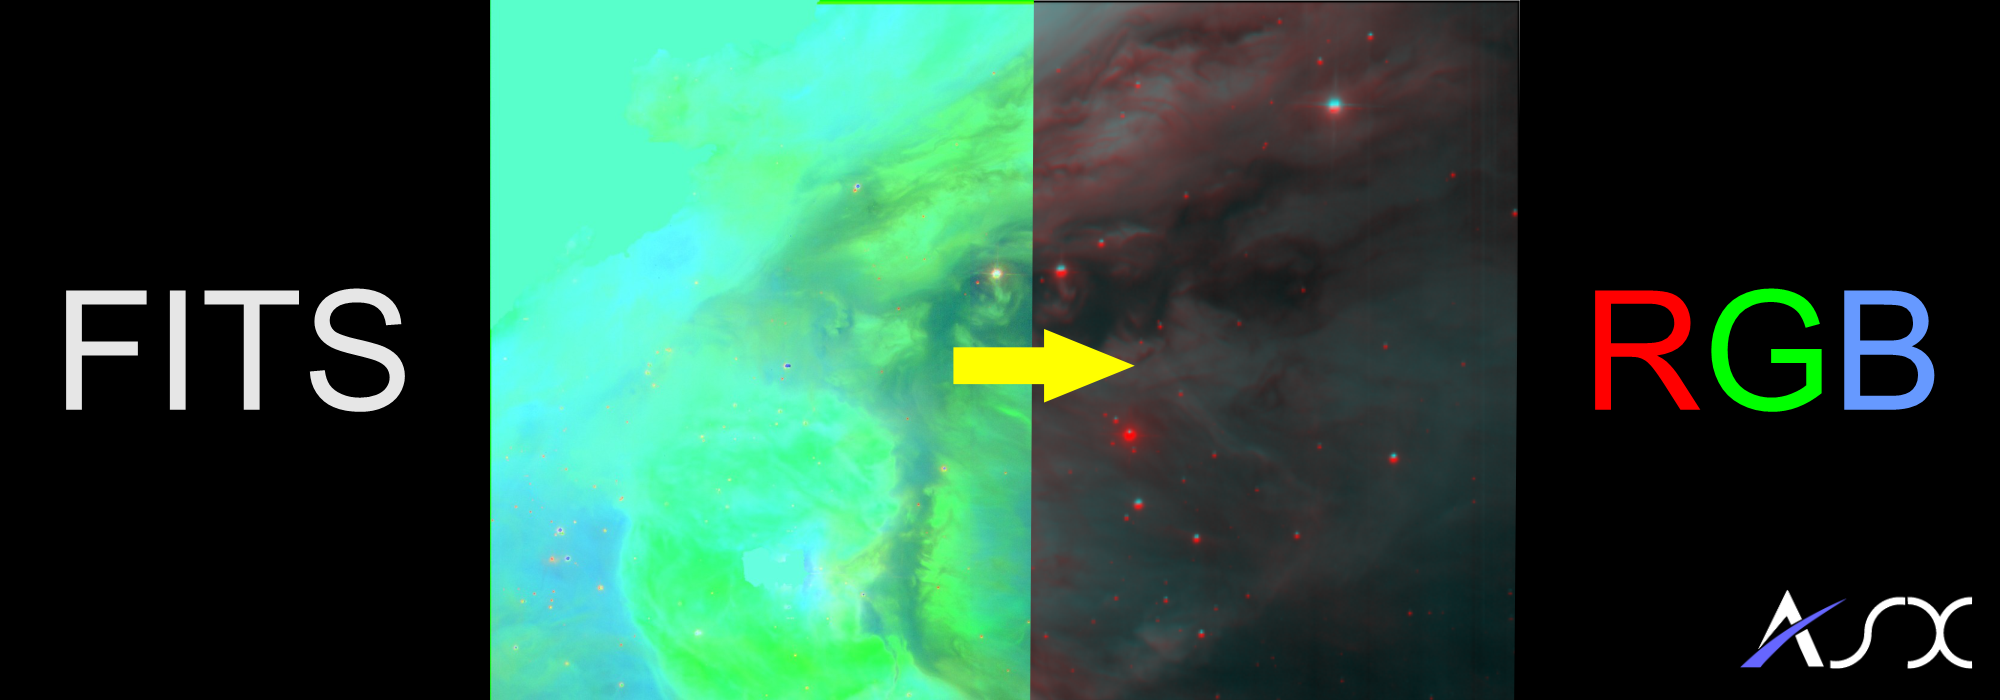

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
pip install astropy


In [7]:
from astropy.io import fits

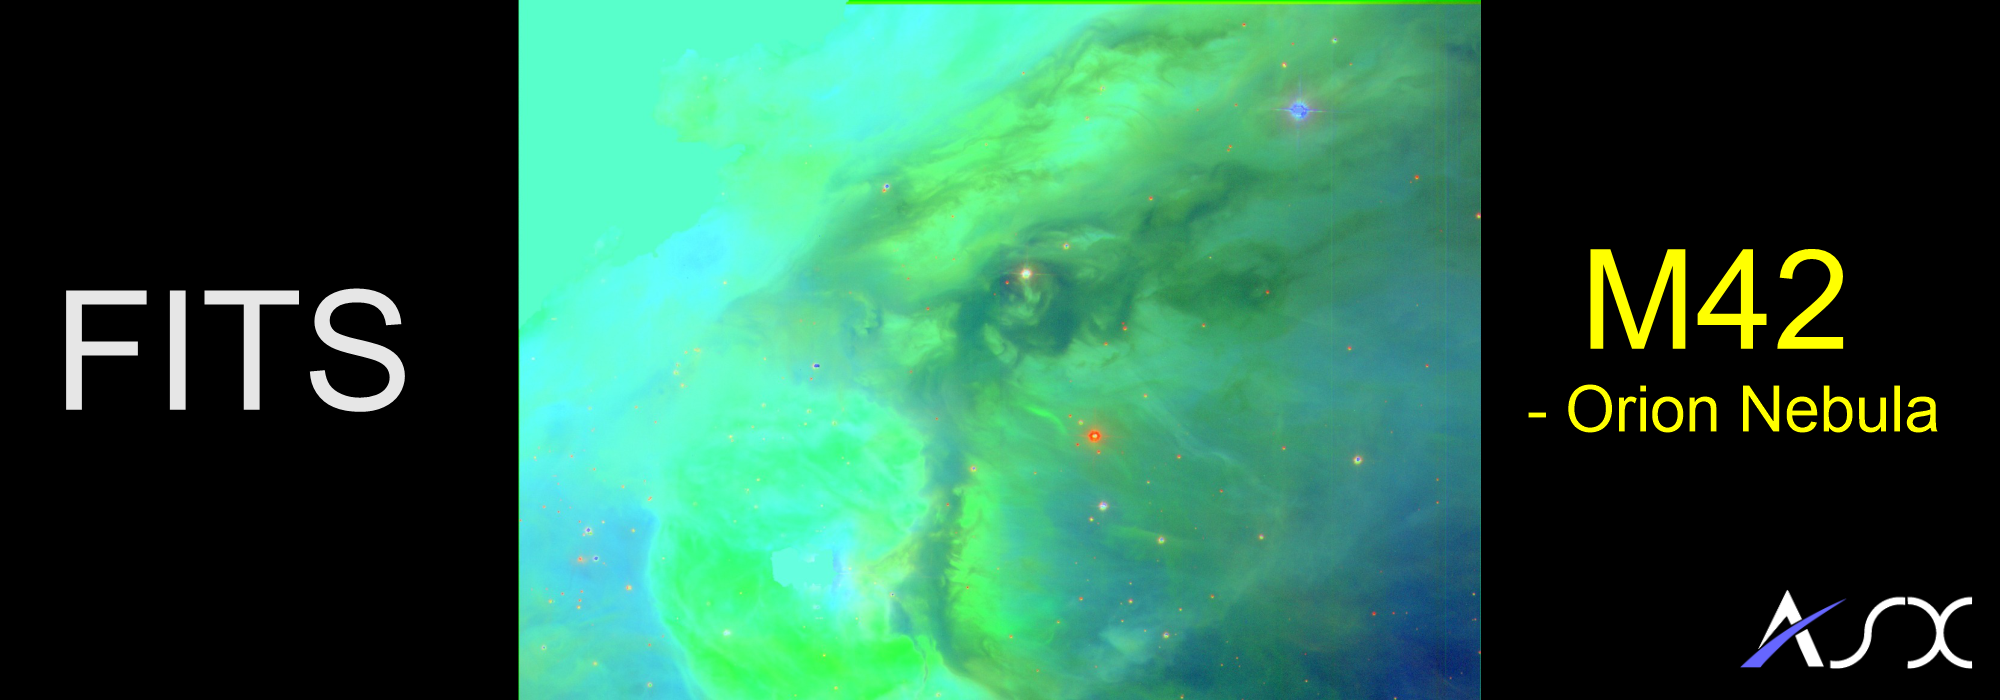

In [8]:
m42 = fits.open('frame-u-006073-4-0063.fits.bz2')

In [9]:
m42

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x00000261559C7BD0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x00000261559F6590>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x00000261559F7790>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x00000261559FD8D0>]

In [10]:
m42.info()

Filename: frame-u-006073-4-0063.fits.bz2
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      96   (2048, 1489)   float32   
  1                1 ImageHDU         6   (2048,)   float32   
  2                1 BinTableHDU     27   1R x 3C   [49152E, 2048E, 1489E]   
  3                1 BinTableHDU     79   1R x 31C   [J, 3A, J, A, D, D, 2J, J, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, E, E]   


In [11]:
m42[0]

In [12]:
m42[0].header

SIMPLE  =                    T /                                                
BITPIX  =                  -32 / 32 bit floating point                          
NAXIS   =                    2                                                  
NAXIS1  =                 2048                                                  
NAXIS2  =                 1489                                                  
EXTEND  =                    T /Extensions may be present                       
BZERO   =              0.00000 /Set by MRD_SCALE                                
BSCALE  =              1.00000 /Set by MRD_SCALE                                
TAI     =        4649973257.37 / 1st row Number of seconds since Nov 17 1858    
RA      =            83.820000 / 1st row RA of telescope boresight (deg)        
DEC     =           -5.349071  / 1st row Dec of telescope boresight (degrees)   
SPA     =             180.000  / 1st row Cam col position angle wrt N (deg)     
IPA     =             137.18

In [13]:
m42[1].header


XTENSION= 'IMAGE   '           /Image Extension created by MWRFITS v1.11        
BITPIX  =                  -32 /                                                
NAXIS   =                    1 /                                                
NAXIS1  =                 2048 /                                                
PCOUNT  =                    0 /                                                
GCOUNT  =                    1 /                                                

In [14]:
data = m42[0].data

In [15]:
type(data)

numpy.ndarray

In [16]:
data.shape

(1489, 2048)

In [17]:
data.dtype.name

'float32'

In [21]:
print('Min:', np.min(data))
print('Max:', np.max(data))
print('Mean:', np.mean(data))
print('Stdev:', np.std(data))


Min: -0.34472656
Max: 552.0
Mean: 5.3398747
Stdev: 15.16415


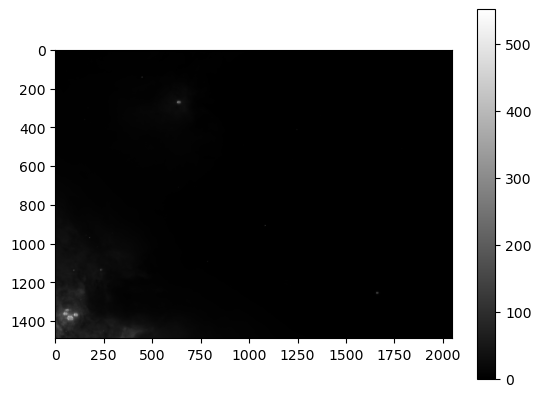

In [22]:
plt.imshow(data, cmap='gray')
plt.colorbar()

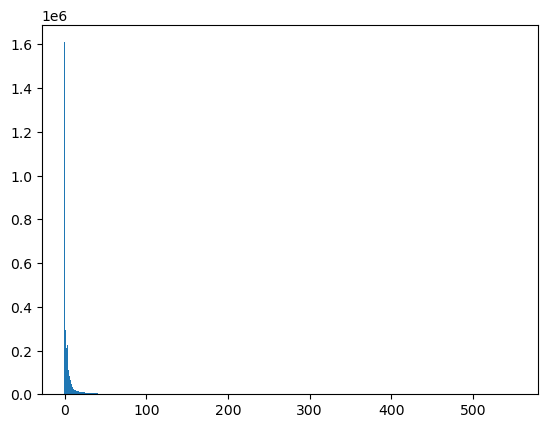

In [23]:
histogram = plt.hist(data.flat, bins=500)

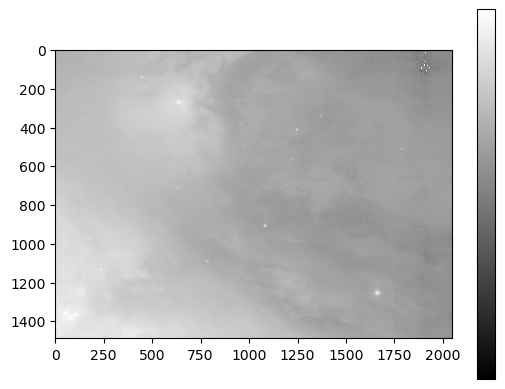

In [24]:
from matplotlib.colors import LogNorm


plt.imshow(data, cmap='gray', norm=LogNorm())
cbar = plt.colorbar(ticks=[4.e3,1.e4,2.e4])
#cbar.ax.set_yticklabels(['5,000','10,000','20,000'])

In [26]:
M42u = fits.open('frame-u-006073-4-0063.fits.bz2')
M42i = fits.open('frame-i-006073-4-0063.fits.bz2')
M42g = fits.open('frame-g-006073-4-0063.fits.bz2')

In [27]:
from astropy.visualization import make_lupton_rgb

In [28]:
g = M42g[0].data
r = M42i[0].data
b = M42u[0].data

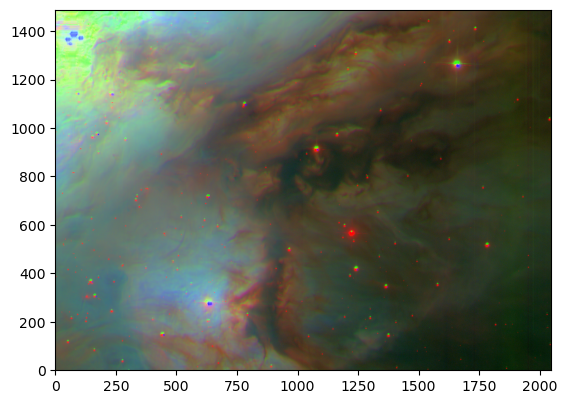

In [29]:
rgb_default = make_lupton_rgb(r, g, b, stretch=1.5,Q=10)



plt.imshow(rgb_default, origin='lower')
plt.savefig("rgbM42.jpg")

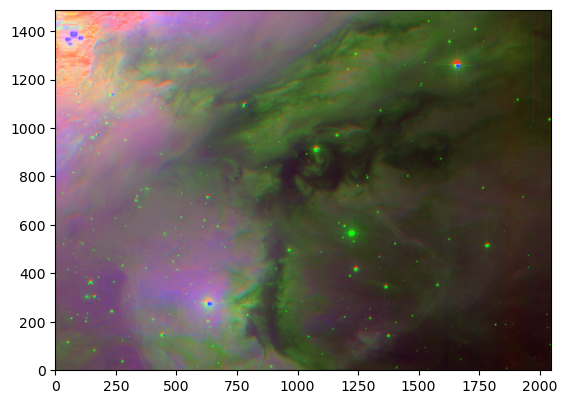

In [30]:
rgb_default = make_lupton_rgb(g, r, b, stretch=1.5,Q=10)



plt.imshow(rgb_default, origin='lower')
plt.savefig("rgbM42.jpg")

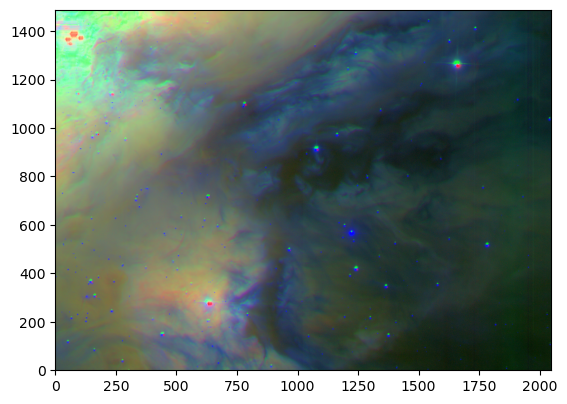

In [31]:
rgb_default = make_lupton_rgb(b, g, r, stretch=1.5,Q=10)



plt.imshow(rgb_default, origin='lower')
plt.savefig("rgbM42.jpg")


# Conclusion :
transforming FITS (Flexible Image Transport System) images into stunning RGB (Red, Green, Blue) visuals is a powerful technique for creating visually appealing astronomical images. By assigning different wavelengths or data channels to color channels, we can reveal intricate details of celestial objects, such as galaxies, nebulae, and star clusters. This process enhances our understanding and appreciation of the cosmos, making complex data more accessible and engaging to both scientists and the general public

Reference Link - https://dr12.sdss.org/fields/name?name